# PTC Task on imSim

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [39]:
import os
import glob
import sys             

In [40]:
file_list = []
path = '/home/elp25/notebooks/Camera-Notebooks/Sims_Notebooks/imsim_flats_bf2.0_nonoise/'
for i in range(1,121,2):
    flat1 = path+'lsst_a_5'+"{:06d}".format(i)+'_R20_S02_i.fits'
    flat2 = path+'lsst_a_5'+"{:06d}".format(i+1)+'_R20_S02_i.fits'
    file_list.append((flat1,flat2))

In [41]:
from lsst.eotest.sensor import PtcTask
import lsst.pex.config as pexConfig

task = PtcTask()

In [42]:
task.config.output_dir = 'outputs_dm_tests'

In [43]:
task.run(sensor_id='R20_S02',infiles=file_list,mask_files=(),gains=None)

/home/elp25/repos/eotest/python/lsst/eotest/sensor/ptcTask.py:204: RuntimeWarning: invalid value encountered in sqrt
  ptc_noise = np.sqrt(pars[2])


In [44]:
figsize = (10,10)

Text(0.5, 0, 'MEAN')

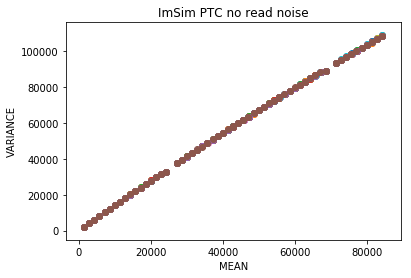

In [45]:
with fits.open(ptc_file) as ptc:
    for amp in imutils.allAmps(ptc_file):
        mean = ptc[1].data.field('AMP%02i_MEAN' % amp)
        var = ptc[1].data.field('AMP%02i_VAR' % amp)
        plt.scatter(mean,var)
plt.title('ImSim PTC no read noise')
plt.ylabel('VARIANCE')
plt.xlabel('MEAN')

In [52]:
file_list = []
path = '/home/elp25/notebooks/Camera-Notebooks/Sims_Notebooks/imsim_flats/bf_2.0/'
for i in range(1,81,2):
    flat1 = path+'lsst_a_5'+"{:06d}".format(i)+'_R20_S02_i.fits'
    flat2 = path+'lsst_a_5'+"{:06d}".format(i+1)+'_R20_S02_i.fits'
    file_list.append((flat1,flat2))

In [53]:
task.run(sensor_id='R20_S02_wnoise',infiles=file_list,mask_files=(),gains=None)

In [57]:
ptc_file = 'outputs_dm_tests/R20_S02_wnoise_ptc.fits'

Text(0.5, 0, 'MEAN')

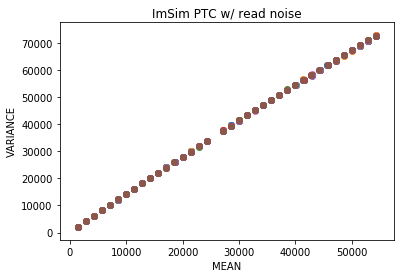

In [59]:
with fits.open(ptc_file) as ptc:
    for amp in imutils.allAmps(ptc_file):
        mean = ptc[1].data.field('AMP%02i_MEAN' % amp)
        var = ptc[1].data.field('AMP%02i_VAR' % amp)
        plt.scatter(mean,var)
plt.title('ImSim PTC w/ read noise')
plt.ylabel('VARIANCE')
plt.xlabel('MEAN')